In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("../models/training_data_large/prod_data_20130103v.txt", sep=" ", usecols=[0,1,2,3,4,5], index_col = 0, header = None, names = ["time","mp","bidpx_","bidsz_","askpx_","asksz_",])

In [4]:
% matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
import sys
sys.path.insert(0, '../models')

In [7]:
from create_signals_bid_ask import find_signals, filter_signals

In [8]:
from create_signals_bid_ask import make_spans

In [9]:
from create_signals_bid_ask import find_all_signals, set_positions

In [10]:
from create_signals_bid_ask import pnl

In [13]:
df.describe()

,mp,bidpx_,bidsz_,askpx_,asksz_
count,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000
mean,4528.503695,4527.986467,292.032126,4529.025566,314.730943
std,7.091962,7.096300,402.466606,7.092489,268.652928
min,4513.442966,4513.000000,10.000000,4514.000000,10.000000
25%,4523.483634,4523.000000,130.000000,4524.000000,120.000000
50%,4528.321634,4528.000000,220.000000,4529.000000,240.000000
75%,4533.542640,4533.000000,360.000000,4534.000000,450.000000
max,4544.511066,4544.000000,7430.000000,4545.000000,2570.000000


In [7]:
df.index[0]

43274820

In [8]:
df.index[-1]

71999993

In [14]:
df.iloc[-1]

mp        4451.578018
bidpx_    4451.000000
bidsz_     350.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71999993, dtype: float64

In [27]:
df.iloc[-4]

mp        4451.524934
bidpx_    4451.000000
bidsz_     320.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71998488, dtype: float64

In [18]:
diff_df = df.diff()

In [19]:
diff_df.describe()

,mp,bidpx_,bidsz_,askpx_,asksz_
count,53924.000000,53924.000000,53924.000000,53924.000000,53924.000000
mean,-0.000625,-0.000631,0.006120,-0.000631,-0.004822
std,0.098591,0.146669,129.519668,0.150784,132.141165
min,-2.150004,-3.000000,-12410.000000,-2.000000,-3340.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.966846,2.000000,12410.000000,2.000000,3270.000000


In [21]:
lagged_df = df.shift(1)

In [22]:
lagged_df.iloc[-1]

mp        4451.578018
bidpx_    4451.000000
bidsz_     350.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71999993, dtype: float64

In [28]:
lagged_df.iloc[-3]

mp        4451.524934
bidpx_    4451.000000
bidsz_     320.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71998990, dtype: float64

In [10]:
lagged_df.index[-1]

71999993

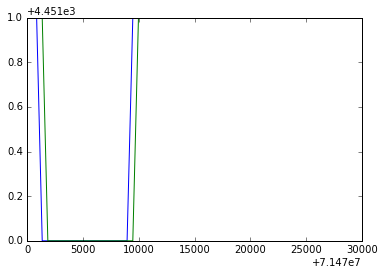

In [40]:
plt.plot(df["bidpx_"].iloc[-1000:-950])
plt.plot(lagged_df["bidpx_"].iloc[-1000:-950])

In [48]:
ask_to_bid = df["askpx_"] - lagged_df["bidpx_"]

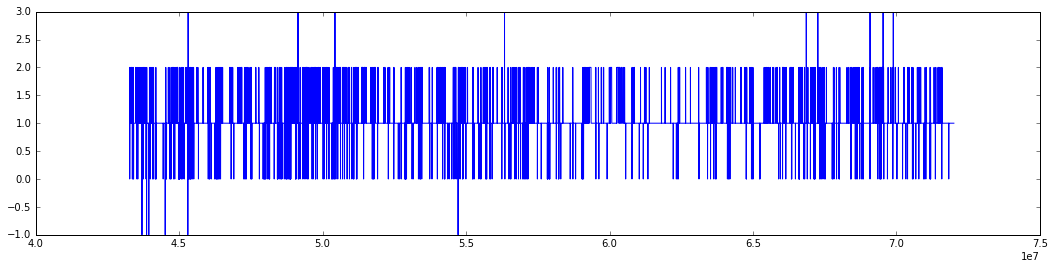

In [49]:
plt.figure(figsize=(18, 4))
plt.plot(ask_to_bid)

In [50]:
bid_to_ask = df["bidpx_"] - lagged_df["askpx_"]

In [60]:
log_ret_buy = df["bidpx_"].apply(np.log) - lagged_df["askpx_"].apply(np.log)

In [75]:
log_ret_bid = df["bidpx_"].apply(np.log) - lagged_df["bidpx_"].apply(np.log)

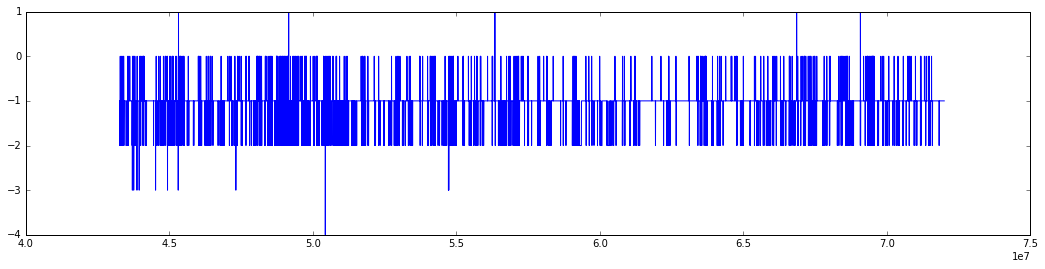

In [51]:
plt.figure(figsize=(18, 4))
plt.plot(bid_to_ask)

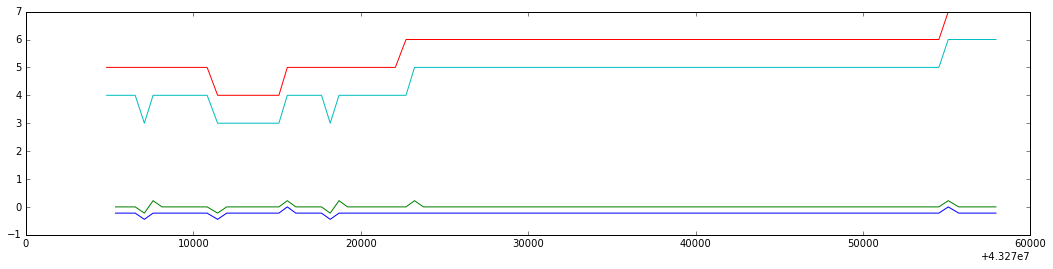

In [77]:
plt.figure(figsize=(18, 4))
plt.plot(log_ret_buy.iloc[0:100]*1000)
plt.plot(log_ret_bid.iloc[0:100]*1000)
#plt.plot(log_ret_buy.cumsum().iloc[0:500]*1000)
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:100]-4481)

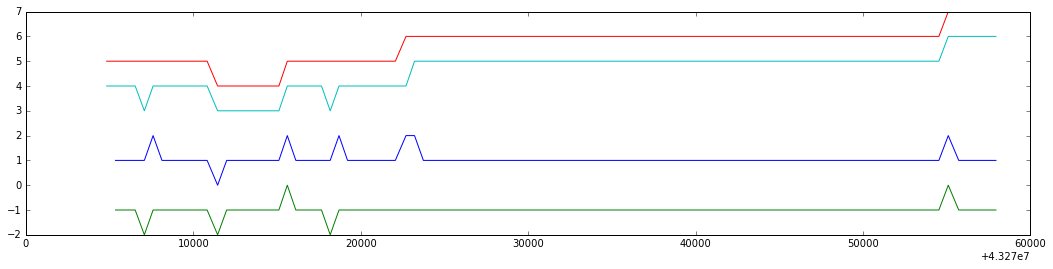

In [58]:
plt.figure(figsize=(18, 4))
plt.plot(ask_to_bid.iloc[0:100])
plt.plot(bid_to_ask.iloc[0:100])
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:100]-4481)

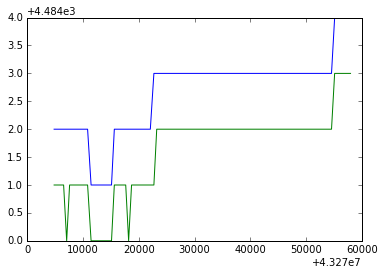

In [56]:
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:100])

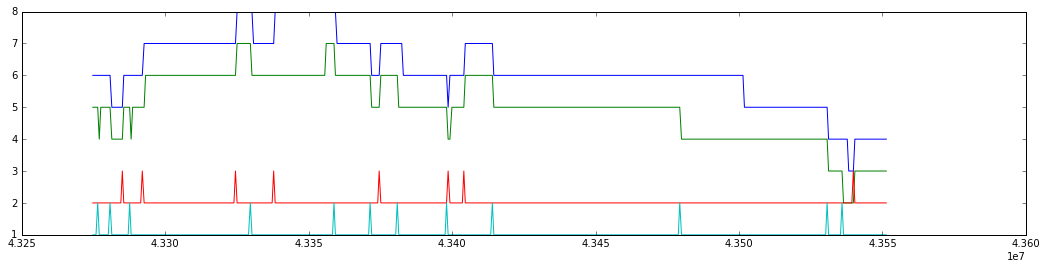

In [43]:
plt.figure(figsize=(18, 4))
#plt.plot((df["askpx_"]-df["bidpx_"]).diff().iloc[0:200]+2)
#plt.plot(df.diff()[["askpx_", "bidpx_"]].iloc[0:300])
# plt.plot(df.diff()["bidpx_"].iloc[0:300])
# plt.plot(df.diff()["askpx_"].iloc[0:300]+2)
# plt.plot(df.diff().shift(-1)["bidpx_"].iloc[0:250])
# plt.plot(df.diff().shift(-1)["askpx_"].iloc[0:250]+2)
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:500]-4480)
plt.plot(inflection_points_buy.iloc[0:500]+2)
plt.plot(inflection_points_sell.iloc[0:500]+1)

In [26]:
inflection_points_buy = df["askpx_"].diff().shift(-1) > 0

In [27]:
inflection_points_sell = df["bidpx_"].diff().shift(-1) < 0

In [11]:
df['Buy'] = np.zeros(df.shape[0])
df['Sell'] = np.zeros(df.shape[0])
df['Buy Close'] = np.zeros(df.shape[0])
df['Sell Close'] = np.zeros(df.shape[0])

comission = 0.0

buy_iterator = inflection_points_buy.iteritems()

#print(df[df['Sell']==1])

max_count = 0

for idx_buy, val_buy in buy_iterator:
    if max_count > 10000:
        break
    sell_iterator = inflection_points_sell.loc[idx_buy:].iteritems()
    if df[df['Sell Close']==1].empty:
        can_open = True
    else:
        can_open = idx_buy > df[df['Sell Close']==1].index[-1]
#         print("Idx:", idx_buy)
#         print("Last buy:", df[df['Sell']==1].index[-1])
#         print(can_open)
    max_count += 1
    if val_buy and can_open:
        print("Buy candidate at {} with price {}".format(idx_buy, df["askpx_"][idx_buy]))
        # sell_candidate = sell_iterator.next()
        for idx_sell, val_sell in sell_iterator:
            if idx_sell > idx_buy: # and val_sell:
                if df["askpx_"][idx_sell] < df["askpx_"][idx_buy] and inflection_points_buy[idx_sell]:
                    print("Better buy candidate at {} with price {}, break...".format(idx_sell, df["askpx_"][idx_sell]))
                    break
                            
                if df["bidpx_"][idx_sell] > (df["askpx_"][idx_buy] + comission) and val_sell:
                    # print("Sell candidate at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    df['Buy'][idx_buy] = 1
                    df['Sell Close'][idx_sell] = 1
                    print("Buy at {} with price {}".format(idx_buy, df["askpx_"][idx_buy]))
                    print("Sell at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    break

sell_iterator = inflection_points_sell.iteritems()
max_count = 0
                    
for idx_sell, val_sell in sell_iterator:
    if max_count > 10000:
        break
    buy_iterator = inflection_points_buy.loc[idx_sell:].iteritems()
    if df[df['Buy Close']==1].empty:
        can_open = True
    else:
        can_open = idx_sell > df[df['Buy Close']==1].index[-1]
#         print("Idx:", idx_buy)
#         print("Last buy:", df[df['Sell']==1].index[-1])
#         print(can_open)
    max_count += 1
    if val_sell and can_open:
        print("Sell candidate at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
        # sell_candidate = sell_iterator.next()
        for idx_buy, val_buy in buy_iterator:
            if idx_buy > idx_sell: # and val_sell:
                if df["bidpx_"][idx_buy] > df["bidpx_"][idx_sell] and inflection_points_sell[idx_buy]:
                    print("Better sell candidate at {} with price {}, break...".format(idx_buy, df["bidpx_"][idx_buy]))
                    break
                            
                if df["askpx_"][idx_buy] < (df["bidpx_"][idx_sell] - comission) and val_buy:
                    # print("Sell candidate at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    df['Buy Close'][idx_buy] = 1
                    df['Sell'][idx_sell] = 1
                    print("Buy at {} with price {}".format(idx_buy, df["askpx_"][idx_buy]))
                    print("Sell at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    break

Buy candidate at 43285110 with price 4485.0
Buy at 43285110 with price 4485.0
Sell at 43329720 with price 4487.0
Buy candidate at 43337846 with price 4487.0
Better buy candidate at 43374613 with price 4486.0, break...
Buy candidate at 43374613 with price 4486.0
Better buy candidate at 43398637 with price 4485.0, break...
Buy candidate at 43398637 with price 4485.0
Buy at 43398637 with price 4485.0
Sell at 43414057 with price 4486.0
Buy candidate at 43539853 with price 4483.0
Buy at 43539853 with price 4483.0
Sell at 43707157 with price 4486.0
Buy candidate at 43711906 with price 4485.0
Buy at 43711906 with price 4485.0
Sell at 43754533 with price 4486.0
Buy candidate at 43760433 with price 4485.0
Buy at 43760433 with price 4485.0
Sell at 43819669 with price 4489.0
Buy candidate at 43823794 with price 4489.0
Better buy candidate at 43873826 with price 4485.0, break...
Buy candidate at 43873826 with price 4485.0
Better buy candidate at 43968323 with price 4483.0, break...
Buy candidate a

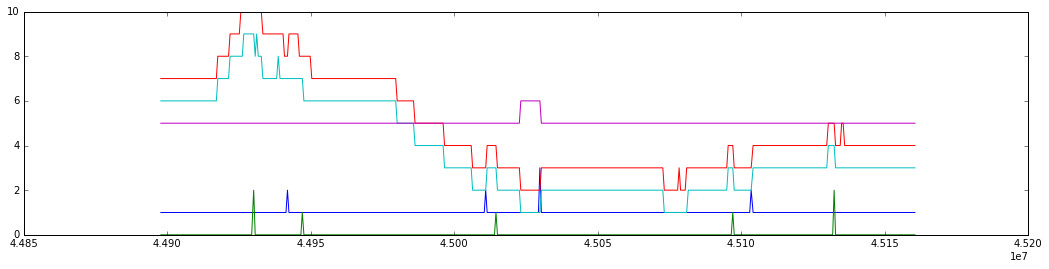

In [166]:
points = 500
start_point = 3000

plt.figure(figsize=(18, 4))
plt.plot(df["Buy"].iloc[start_point:start_point+points]+df["Buy Close"].iloc[start_point:start_point+points]+1)
#plt.plot(df["Buy Close"].iloc[start_point:start_point+points]+1)
plt.plot(df["Sell"].iloc[start_point:start_point+points]+df["Sell Close"].iloc[start_point:start_point+points])
#plt.plot(df["Sell Close"].iloc[start_point:start_point+points])
plt.plot(df[["askpx_", "bidpx_"]].iloc[start_point:start_point+points]-4470)
# plt.plot(df.diff().shift(-1)["bidpx_"].iloc[0:points]-5)
# plt.plot(df.diff().shift(-1)["askpx_"].iloc[0:points]-3)
# plt.plot(inflection_points_buy.iloc[start_point:start_point+points]+10)
# plt.plot(inflection_points_sell.iloc[start_point:start_point+points]+9)
plt.plot(temp_df[start_point:start_point+points]+5)

In [11]:
points = 10000
start_point = 0

plt.figure(figsize=(18, 4))
plt.plot(df["Buy"].iloc[start_point:start_point+points]+1)
plt.plot(df["Sell"].iloc[start_point:start_point+points])
# plt.plot(df["Buy Close"].iloc[start_point:start_point+points]+1)
# plt.plot(df["Sell Close"].iloc[start_point:start_point+points])
# plt.plot(df["Buy Mod"].iloc[start_point:start_point+points]+4)
# plt.plot(df["Sell Mod"].iloc[start_point:start_point+points]+3)
#plt.plot(df["Buy"].iloc[start_point:start_point+points]+df["Buy Close"].iloc[start_point:start_point+points]+1)
#plt.plot(df["Sell"].iloc[start_point:start_point+points]+df["Sell Close"].iloc[start_point:start_point+points])
plt.plot(df[["askpx_", "bidpx_"]].iloc[start_point:start_point+points]-4510)
plt.plot(df[["Buys", "Sells"]][start_point:start_point+points]+3)

KeyError: 'Buy'

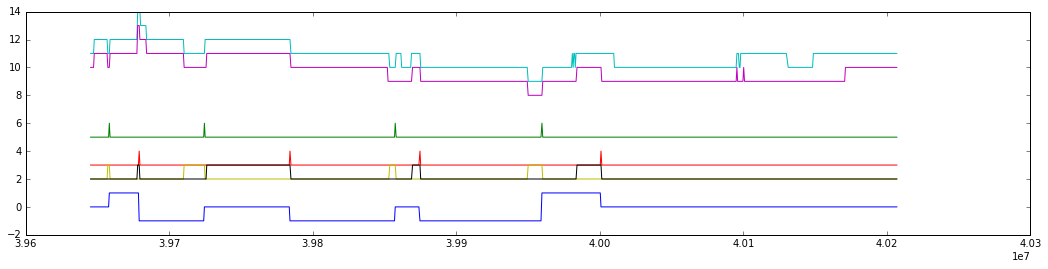

In [17]:
points = 1000
start_point = 0

plt.figure(figsize=(18, 4))
# plt.plot(df["Buy"].iloc[start_point:start_point+points]+1)
# plt.plot(df["Sell"].iloc[start_point:start_point+points])
# plt.plot(df1["Buy"].iloc[start_point:start_point+points]+7)
# plt.plot(df1["Sell"].iloc[start_point:start_point+points]+5)
plt.plot(df1["Pos"].iloc[start_point:start_point+points])
plt.plot(df1["Buy"].iloc[start_point:start_point+points]+5)
plt.plot(df1["Sell"].iloc[start_point:start_point+points]+3)
plt.plot(df1[["askpx_", "bidpx_"]].iloc[start_point:start_point+points]-4105)
# plt.plot(inflection_points_buy.iloc[start_point:start_point+points])
# plt.plot(0-inflection_points_sell.iloc[start_point:start_point+points])
plt.plot(df1[["Buys", "Sells"]][start_point:start_point+points]+2)

In [12]:
df = find_signals(df, "Buy")

Buy candidate at 43285568 with price 4519.0
Buy at 43285568 with price 4519.0
Sell at 43313029 with price 4523.0
Buy candidate at 43330107 with price 4521.0
Better Buy candidate at 43341796 with price 4520.0, break...
Buy candidate at 43341796 with price 4520.0
Buy at 43341796 with price 4520.0
Sell at 43346665 with price 4522.0
Buy candidate at 43358467 with price 4522.0
Better Buy candidate at 43463768 with price 4520.0, break...
Buy candidate at 43463768 with price 4520.0
Better Buy candidate at 43488857 with price 4518.0, break...
Buy candidate at 43488857 with price 4518.0
Better Buy candidate at 43583544 with price 4516.0, break...
Buy candidate at 43498562 with price 4519.0
Better Buy candidate at 43583544 with price 4516.0, break...
Buy candidate at 43583544 with price 4516.0
Buy at 43583544 with price 4516.0
Sell at 43646310 with price 4517.0
Buy candidate at 43755771 with price 4516.0
Buy at 43755771 with price 4516.0
Sell at 43830079 with price 4517.0
Buy candidate at 438626

In [13]:
df = find_signals(df, "Sell")

Sell candidate at 43276926 with price 4520.0
Better Sell candidate at 43313029 with price 4523.0, break...
Sell candidate at 43313029 with price 4524.0
Sell at 43313029 with price 4523.0
Buy at 43330107 with price 4521.0
Sell candidate at 43333351 with price 4521.0
Better Sell candidate at 43346665 with price 4522.0, break...
Sell candidate at 43339673 with price 4521.0
Better Sell candidate at 43346665 with price 4522.0, break...
Sell candidate at 43346665 with price 4523.0
Sell at 43346665 with price 4522.0
Buy at 43463768 with price 4520.0
Sell candidate at 43464914 with price 4521.0
Sell at 43464914 with price 4520.0
Buy at 43488857 with price 4518.0
Sell candidate at 43493850 with price 4519.0
Sell at 43493850 with price 4518.0
Buy at 43583544 with price 4516.0
Sell candidate at 43646310 with price 4518.0
Sell at 43646310 with price 4517.0
Buy at 43755771 with price 4516.0
Sell candidate at 43830079 with price 4518.0
Sell at 43830079 with price 4517.0
Buy at 43862666 with price 45

In [16]:
df["Sell Close"].equals(df_buy["Sell Close"])

True

In [14]:
df.columns

Index([u'mp', u'bidpx_', u'bidsz_', u'askpx_', u'asksz_', u'Sell Close', u'Buy Close', u'Buy', u'Sell', u'Buy Open', u'Sell Open'], dtype='object')

In [14]:
df = filter_signals(df)

Signal -1.0 at 43313029
Consecutive similar signal -1.0 at 43346665
mp            4519.558334
bidpx_        4519.000000
bidsz_          40.000000
askpx_        4520.000000
asksz_          40.000000
Buy              1.000000
Sell Close       0.000000
Sell             0.000000
Buy Close        0.000000
Buy Mod          0.000000
Sell Mod         0.000000
Name: 43341796, dtype: float64
Signal 1.0 at 43341796
Signal -1.0 at 43346665
Signal 1.0 at 43583544
Signal -1.0 at 43646310
Signal 1.0 at 43755771
Signal -1.0 at 43830079
Signal 1.0 at 43862666
Signal -1.0 at 44326104
Signal 1.0 at 44705644
Signal -1.0 at 45030506
Signal 1.0 at 45059458
Signal -1.0 at 45712450
Signal 1.0 at 45723790
Signal -1.0 at 45739240
Signal 1.0 at 45769081
Signal -1.0 at 45793866
Signal 1.0 at 45959432
Signal -1.0 at 46017896
Signal 1.0 at 46373218
Signal -1.0 at 46626573
Signal 1.0 at 46827793
Signal -1.0 at 46962878
Signal 1.0 at 47134275
Signal -1.0 at 47245400
Signal 1.0 at 47249561
Signal -1.0 at 47500797
Sign

In [18]:
df = make_spans(df, "Buy")

Outer loop: 43341796 4520.0
Outer loop: 43583544 4516.0
Outer loop: 43755771 4516.0
Outer loop: 43862666 4516.0
Outer loop: 44705644 4518.0
Outer loop: 45059458 4522.0
Outer loop: 45723790 4524.0
Outer loop: 45769081 4524.0
Outer loop: 45959432 4522.0
Outer loop: 46373218 4521.0
Outer loop: 46827793 4518.0
Outer loop: 47134275 4514.0
Outer loop: 47249561 4515.0
Outer loop: 47594347 4516.0
Outer loop: 47973839 4515.0
Outer loop: 48214435 4514.0
Outer loop: 48490207 4517.0
Outer loop: 48703498 4515.0
Outer loop: 48869890 4516.0
Outer loop: 49121227 4520.0
Outer loop: 49304620 4520.0
Outer loop: 49873118 4524.0
Outer loop: 50106103 4522.0
Outer loop: 50211278 4522.0
Outer loop: 50437401 4521.0
Outer loop: 50637344 4523.0
Outer loop: 50759968 4522.0
Outer loop: 50993968 4524.0
Outer loop: 51533375 4524.0
Outer loop: 51822346 4521.0
Outer loop: 52261926 4523.0
Outer loop: 52713328 4528.0
Outer loop: 52863045 4528.0
Outer loop: 53187859 4529.0
Outer loop: 53925727 4529.0
Outer loop: 54046420

In [19]:
df = make_spans(df, "Sell")

Outer loop: 43313029 4523.0
Outer loop: 43346665 4522.0
Outer loop: 43646310 4517.0
Outer loop: 43830079 4517.0
Outer loop: 44326104 4524.0
Outer loop: 45030506 4524.0
Outer loop: 45712450 4526.0
Outer loop: 45739240 4525.0
Outer loop: 45793866 4526.0
Outer loop: 46017896 4525.0
Outer loop: 46626573 4522.0
Outer loop: 46962878 4520.0
Outer loop: 47245400 4516.0
Outer loop: 47500797 4517.0
Outer loop: 47633161 4517.0
Outer loop: 48049868 4516.0
Outer loop: 48410518 4518.0
Outer loop: 48565433 4518.0
Outer loop: 48807016 4517.0
Outer loop: 49003098 4521.0
Outer loop: 49269208 4521.0
Outer loop: 49683902 4527.0
Outer loop: 49980445 4525.0
Outer loop: 50180238 4523.0
Outer loop: 50369228 4523.0
Outer loop: 50593129 4524.0
Outer loop: 50681105 4524.0
Outer loop: 50932917 4526.0
Outer loop: 51369176 4527.0
Outer loop: 51665866 4527.0
Outer loop: 52052852 4526.0
Outer loop: 52669183 4529.0
Outer loop: 52833418 4529.0
Outer loop: 52959574 4532.0
Outer loop: 53531992 4531.0
Outer loop: 54013050

In [16]:
1+1

2

In [180]:
df.loc[45020000:45035000, "askpx_"]

time
45020100    4473
45020601    4473
45021102    4473
45021605    4473
45022106    4473
45022633    4473
45023138    4472
45023662    4472
45024178    4472
45024682    4472
45025184    4472
45025693    4472
45026213    4472
45026717    4472
45027231    4472
45027733    4472
45028268    4472
45028781    4472
45029284    4472
45029785    4472
45030295    4473
45030829    4473
45031332    4473
45031846    4473
45032348    4473
45032855    4473
45033370    4473
45033899    4473
45034429    4473
45034931    4473
Name: askpx_, dtype: float64

In [27]:
pnl = df["bidpx_"][df["Sell"]==1].sum() - df["askpx_"][df["Buy"]==1].sum()

In [29]:
df["bidpx_"][df["Sell"]==1].sum()

223129.0

In [30]:
df["askpx_"][df["Buy"]==1].sum()

218497.0

In [31]:
df["bidpx_"][df["Sell"]==1].count()

50

In [26]:
deals = []
pnl = 0

is_opened = False

for idx, row in df.iterrows():
    if row["Buy"]:
        if is_opened:
            deals.append(-row["askpx_"])
        deals.append(-row["askpx_"])
        is_opened = True
    elif row["Sell"]:
        if is_opened:
            deals.append(row["bidpx_"])
        deals.append(row["bidpx_"])
        is_opened = True

deals.pop()

-4451.0

In [35]:
deals

[4487.0,
 -4485.0,
 -4485.0,
 4486.0,
 4486.0,
 -4483.0,
 -4483.0,
 4486.0,
 4486.0,
 -4485.0,
 -4485.0,
 4486.0,
 4486.0,
 -4485.0,
 -4485.0,
 4489.0,
 4489.0,
 -4483.0,
 -4483.0,
 4487.0,
 4487.0,
 -4475.0,
 -4475.0,
 4479.0,
 4479.0,
 -4472.0,
 -4472.0,
 4474.0,
 4474.0,
 -4469.0,
 -4469.0,
 4471.0,
 4471.0,
 -4470.0,
 -4470.0,
 4472.0,
 4472.0,
 -4471.0,
 -4471.0,
 4473.0,
 4473.0,
 -4463.0,
 -4463.0,
 4466.0,
 4466.0,
 -4465.0,
 -4465.0,
 4467.0,
 4467.0,
 -4459.0,
 -4459.0,
 4462.0,
 4462.0,
 -4461.0,
 -4461.0,
 4463.0,
 4463.0,
 -4457.0,
 -4457.0,
 4464.0,
 4464.0,
 -4462.0,
 -4462.0,
 4463.0,
 4463.0,
 -4460.0,
 -4460.0,
 4462.0,
 4462.0,
 -4457.0,
 -4457.0,
 4466.0,
 4466.0,
 -4464.0,
 -4464.0,
 4467.0,
 4467.0,
 -4466.0,
 -4466.0,
 4468.0,
 4468.0,
 -4467.0,
 -4467.0,
 4468.0,
 4468.0,
 -4467.0,
 -4467.0,
 4470.0,
 4470.0,
 -4469.0,
 -4469.0,
 4470.0,
 4470.0,
 -4463.0,
 -4463.0,
 4464.0,
 4464.0,
 -4463.0,
 -4463.0,
 4469.0,
 4469.0,
 -4468.0,
 -4468.0,
 4470.0,
 4470.0,
 -4

In [29]:
np.sum(deals)

9228.0

In [32]:
df["bidpx_"][df["Buy"]==1].count()

49

In [109]:
buys = df["Buy"]+df["Buy Close"]

In [111]:
buys[buys == 2]

time
43398637    2
43539853    2
43711906    2
43760433    2
43968323    2
44851529    2
45029785    2
45315102    2
45382019    2
45656225    2
46421086    2
47036689    2
47377881    2
47520428    2
48045669    2
48500703    2
dtype: float64

In [112]:
sells = df["Sell"]+df["Sell Close"]

In [113]:
sells[sells == 2]

time
43329720    2
43414057    2
43707157    2
43754533    2
43819669    2
44103767    2
44930050    2
45132322    2
45341752    2
45498606    2
46056106    2
46813887    2
47171589    2
47501220    2
47798319    2
48426560    2
48532237    2
dtype: float64

In [ ]:
temp_df = pd.DataFrame(data=np.zeros(df.shape[0]), columns=["Buys"], index=df.index)
reversed_df = df[::-1]

max_count = 0
for idx in buys[buys == 2].index:
    signal_val = df.loc[idx]
    iterator = reversed_df.loc[idx:].iterrows()
    # print(iterator)
    print("Outer loop:", idx, signal_val["askpx_"])
#     print(iterator.next())
    for i, val in iterator:
        print("Inner loop:", i, val["askpx_"])
        if val["askpx_"] == signal_val["askpx_"]:
            print("Add to buys")
            temp_df["Buys"][i] = 1
        else:
            break

In [14]:
df1 = find_all_signals(df)

Inner signal:  43276926 Sell
Recursion
Inner signal:  43285568 Buy
Outer signal:  43276926 Sell
Best Sell candidate at 43276926
Inner signal:  43285568 Buy
Recursion
Inner signal:  43292087 Buy
Outer signal:  43285568 Buy
Compare 43285568 bid: 4518.0 ask: 4519.0 with 43292087 bid: 4519.0 ask: 4520.0
Inner signal:  43296800 Buy
Outer signal:  43285568 Buy
Compare 43285568 bid: 4518.0 ask: 4519.0 with 43296800 bid: 4520.0 ask: 4521.0
Inner signal:  43300518 Buy
Outer signal:  43285568 Buy
Compare 43285568 bid: 4518.0 ask: 4519.0 with 43300518 bid: 4521.0 ask: 4522.0
Inner signal:  43302630 Buy
Outer signal:  43285568 Buy
Compare 43285568 bid: 4518.0 ask: 4519.0 with 43302630 bid: 4522.0 ask: 4523.0
Inner signal:  43313029 Sell
Outer signal:  43285568 Buy
Best Buy candidate at 43285568
Inner signal:  43313029 Sell
Recursion
Inner signal:  43318348 Sell
Outer signal:  43313029 Sell
Compare 43313029 bid: 4523.0 ask: 4524.0 with 43318348 bid: 4522.0 ask: 4523.0
Inner signal:  43322546 Sell
O

In [11]:
df1 = find_all_signals(df)

Inner signal:  39647117 Buy
Recursion
Inner signal:  39656544 Sell
Outer signal:  39647117 Buy
Best Buy candidate at 39647117, break...
Inner signal:  39656544 Sell
Recursion
Inner signal:  39658106 Buy
Outer signal:  39656544 Sell
Best Sell candidate at 39656544, break...
Inner signal:  39658106 Buy
Recursion
Inner signal:  39677329 Buy
Outer signal:  39658106 Buy
Compare 39658106 bid: 4115.0 ask: 4116.0 with 39677329 bid: 4116.0 ask: 4117.0
Inner signal:  39678916 Sell
Outer signal:  39658106 Buy
Best Buy candidate at 39658106, break...
Inner signal:  39678916 Sell
Recursion
Inner signal:  39683573 Sell
Outer signal:  39678916 Sell
Compare 39678916 bid: 4118.0 ask: 4119.0 with 39683573 bid: 4117.0 ask: 4118.0
Inner signal:  39709720 Sell
Outer signal:  39678916 Sell
Compare 39678916 bid: 4118.0 ask: 4119.0 with 39709720 bid: 4116.0 ask: 4117.0
Inner signal:  39724378 Buy
Outer signal:  39678916 Sell
Best Sell candidate at 39678916, break...
Inner signal:  39724378 Buy
Recursion
Inner

In [12]:
df1 = set_positions(df1)

Long positions: 43 Short positions: 46


In [13]:
df1 = make_spans(df1, 'Buy')

Outer loop: 39658106 4116.0
Outer loop: 39724378 4116.0
Outer loop: 39857366 4115.0
Outer loop: 39959606 4114.0
Outer loop: 40475870 4115.0
Outer loop: 40767588 4117.0
Outer loop: 40856733 4117.0
Outer loop: 41472894 4116.0
Outer loop: 42069394 4116.0
Outer loop: 42611377 4113.0
Outer loop: 42686255 4113.0
Outer loop: 43597650 4113.0
Outer loop: 44324345 4114.0
Outer loop: 44534001 4116.0
Outer loop: 44768361 4115.0
Outer loop: 45786987 4114.0
Outer loop: 46161572 4112.0
Outer loop: 46191674 4112.0
Outer loop: 48407311 4113.0
Outer loop: 51063608 4113.0
Outer loop: 51369345 4112.0
Outer loop: 51401728 4112.0
Outer loop: 53888376 4109.0
Outer loop: 53916357 4109.0
Outer loop: 54009978 4107.0
Outer loop: 54107426 4105.0
Outer loop: 54175270 4103.0
Outer loop: 54307426 4105.0
Outer loop: 55679422 4104.0
Outer loop: 55886360 4102.0
Outer loop: 55930289 4098.0
Outer loop: 55951176 4100.0
Outer loop: 56035990 4099.0
Outer loop: 56171587 4100.0
Outer loop: 56672933 4096.0
Outer loop: 57012718

In [14]:
df1 = make_spans(df1, 'Sell')

Outer loop: 39678916 4118.0
Outer loop: 39784015 4116.0
Outer loop: 39874606 4115.0
Outer loop: 40000770 4115.0
Outer loop: 40693672 4116.0
Outer loop: 40820680 4118.0
Outer loop: 41555732 4117.0
Outer loop: 42053675 4117.0
Outer loop: 42214594 4115.0
Outer loop: 42780385 4114.0
Outer loop: 43645636 4114.0
Outer loop: 44399028 4117.0
Outer loop: 44453555 4117.0
Outer loop: 44590194 4116.0
Outer loop: 45183929 4115.0
Outer loop: 45848881 4114.0
Outer loop: 46958048 4114.0
Outer loop: 48430301 4114.0
Outer loop: 50282559 4114.0
Outer loop: 51081840 4113.0
Outer loop: 51505221 4113.0
Outer loop: 53325060 4112.0
Outer loop: 53930449 4110.0
Outer loop: 53968446 4110.0
Outer loop: 54054002 4108.0
Outer loop: 54074672 4108.0
Outer loop: 54116080 4105.0
Outer loop: 54262157 4106.0
Outer loop: 54278112 4106.0
Outer loop: 55422014 4105.0
Outer loop: 55844266 4103.0
Outer loop: 55888404 4102.0
Outer loop: 55935861 4099.0
Outer loop: 55968181 4101.0
Outer loop: 56149623 4100.0
Outer loop: 56363167

In [12]:
pnl(df1)

Running PnL:  -4116.0
Running PnL:  4120.0
Running PnL:  4.0
Running PnL:  4120.0
Running PnL:  5.0
Running PnL:  4120.0
Running PnL:  -4108.0
Running PnL:  7.0
Running PnL:  -4108.0
Running PnL:  8.0
Running PnL:  -4109.0
Running PnL:  4127.0
Running PnL:  10.0
Running PnL:  -4106.0
Running PnL:  11.0
Running PnL:  4128.0
Running PnL:  12.0
Running PnL:  4127.0
Running PnL:  14.0
Running PnL:  -4099.0
Running PnL:  15.0
Running PnL:  -4098.0
Running PnL:  16.0
Running PnL:  -4098.0
Running PnL:  19.0
Running PnL:  4136.0
Running PnL:  20.0
Running PnL:  4136.0
Running PnL:  21.0
Running PnL:  4136.0
Running PnL:  22.0
Running PnL:  4136.0
Running PnL:  24.0
Running PnL:  -4088.0
Running PnL:  26.0
Running PnL:  -4087.0
Running PnL:  27.0
Running PnL:  4141.0
Running PnL:  28.0
Running PnL:  4141.0
Running PnL:  29.0
Running PnL:  -4083.0
Running PnL:  30.0
Running PnL:  4142.0
Running PnL:  33.0
Running PnL:  -4076.0
Running PnL:  34.0
Running PnL:  4144.0
Running PnL:  -4070.0
Runnin

(138.0, 160)